In [1]:
import json

In [3]:
with open('recipes.json', encoding="utf8") as f:
    data = json.load(f)


In [8]:
from pandas.io.json import json_normalize
df = json_normalize(data[2]['data'])

In [9]:
df.head()

,id,name,ingredients,method,image,video
0,1,KALAKAND SWEET / MITHAI,Milk powder 2 cups~Sugar 1/2 cup or to taste~...,"In a heat resistant bowl add powder milk, crea...",http://www.ainycooks.com/wp-content/uploads/20...,https://www.youtube.com/embed/8ApA0f7vs00
1,2,ARIZONA CHICKEN STEAK,Chicken fillets 2 flattened~Salt to tatse~Whit...,"Marinate chicken fillet with salt, pepper, mus...",http://www.ainycooks.com/wp-content/uploads/20...,None
2,3,CHICKEN CREAMY PIE,Chicken boiled and shredded 1 cup~Onion chopp...,"In a pan add butter and onion, stir it for few...",http://www.ainycooks.com/wp-content/uploads/20...,None
3,4,2 INGREDIENTS CHOCOLATE MOUSSE,Cooking Chocolate / Milk chocolate 200g~Whipp...,Add 1/2 cup cream in chocolate and microwave i...,http://www.ainycooks.com/wp-content/uploads/20...,None
4,5,KARACHI FAMOUS STUDENT BIRYANI,Rice Basmati 1/2 kg~Chicken 1/2 kg~Red chili ...,Soak rice for 20 minutes.~Boil rice and add sa...,http://www.ainycooks.com/wp-content/uploads/20...,None


In [12]:
df['ingredients'][0].split('~')

['Milk powder 2 cups',
 'Sugar  1/2 cup or to taste',
 'Cream 200 ml',
 'Nuts as required']

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [25]:
sentences = df['ingredients'].values
y = df['name'].values


In [26]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences)

X_train = vectorizer.transform(sentences)
X_test  = vectorizer.transform(sentences)

In [28]:
classifier = LogisticRegression()
classifier.fit(X_train, y)
score = classifier.score(X_test, y)

print("Accuracy:", score)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.9860546194073213


In [59]:
classifier(X_test[0])

TypeError: 'LogisticRegression' object is not callable

In [36]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1769, activation='sigmoid'))


In [37]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                17700     
_________________________________________________________________
dense_4 (Dense)              (None, 1769)              19459     
Total params: 37,159
Trainable params: 37,159
Non-trainable params: 0
_________________________________________________________________


In [38]:
y  = vectorizer.transform(y)

AttributeError: lower not found

In [39]:
history = model.fit(X_train, y,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, y),
                    batch_size=10)

Train on 1721 samples, validate on 1721 samples
Epoch 1/100
1721/1721 [==============================] - 3s 2ms/step - loss: 0.2576 - accuracy: 0.9756 - val_loss: 0.0382 - val_accuracy: 0.9984
Epoch 2/100
1721/1721 [==============================] - 2s 950us/step - loss: 0.0258 - accuracy: 0.9983 - val_loss: 0.0189 - val_accuracy: 0.9984
Epoch 3/100
1721/1721 [==============================] - 2s 946us/step - loss: 0.0166 - accuracy: 0.9984 - val_loss: 0.0148 - val_accuracy: 0.9984
Epoch 4/100
1721/1721 [==============================] - 2s 940us/step - loss: 0.0140 - accuracy: 0.9984 - val_loss: 0.0132 - val_accuracy: 0.9984
Epoch 5/100
1721/1721 [==============================] - 2s 945us/step - loss: 0.0128 - accuracy: 0.9984 - val_loss: 0.0123 - val_accuracy: 0.9984
Epoch 6/100
1721/1721 [==============================] - 2s 919us/step - loss: 0.0121 - accuracy: 0.9984 - val_loss: 0.0117 - val_accuracy: 0.9984
Epoch 7/100
1721/1721 [==============================] - 2s 938us/step -

In [40]:
loss, accuracy = model.evaluate(X_train, y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9992
Testing Accuracy:  0.9992


In [45]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

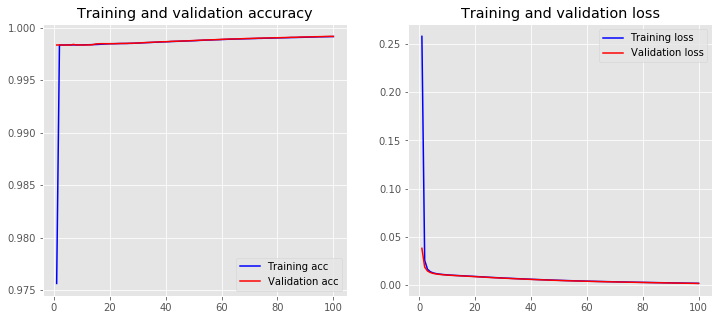

In [47]:
plot_history(history)

In [48]:
df.head()

,id,name,ingredients,method,image,video
0,1,KALAKAND SWEET / MITHAI,Milk powder 2 cups~Sugar 1/2 cup or to taste~...,"In a heat resistant bowl add powder milk, crea...",http://www.ainycooks.com/wp-content/uploads/20...,https://www.youtube.com/embed/8ApA0f7vs00
1,2,ARIZONA CHICKEN STEAK,Chicken fillets 2 flattened~Salt to tatse~Whit...,"Marinate chicken fillet with salt, pepper, mus...",http://www.ainycooks.com/wp-content/uploads/20...,None
2,3,CHICKEN CREAMY PIE,Chicken boiled and shredded 1 cup~Onion chopp...,"In a pan add butter and onion, stir it for few...",http://www.ainycooks.com/wp-content/uploads/20...,None
3,4,2 INGREDIENTS CHOCOLATE MOUSSE,Cooking Chocolate / Milk chocolate 200g~Whipp...,Add 1/2 cup cream in chocolate and microwave i...,http://www.ainycooks.com/wp-content/uploads/20...,None
4,5,KARACHI FAMOUS STUDENT BIRYANI,Rice Basmati 1/2 kg~Chicken 1/2 kg~Red chili ...,Soak rice for 20 minutes.~Boil rice and add sa...,http://www.ainycooks.com/wp-content/uploads/20...,None


In [49]:
ingredients = []

In [51]:
for index, row in df.iterrows():
    ingredients.extend(row['ingredients'].split('~'))

In [53]:
ingredients = set(ingredients)

In [54]:
len(ingredients)

10814

In [61]:
datas = []
for index, row in df.iterrows():
    ings = row['ingredients'].split('~')
    data = {}
    data['recipie'] = row['name']
    data['ingredients'] = ings
    datas.append(data)

In [63]:
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

In [64]:
df = json_normalize(datas)

In [65]:
df.head()

,recipie,ingredients
0,KALAKAND SWEET / MITHAI,"[Milk powder 2 cups, Sugar 1/2 cup or to tast..."
1,ARIZONA CHICKEN STEAK,"[Chicken fillets 2 flattened, Salt to tatse, W..."
2,CHICKEN CREAMY PIE,"[Chicken boiled and shredded 1 cup, Onion cho..."
3,2 INGREDIENTS CHOCOLATE MOUSSE,"[Cooking Chocolate / Milk chocolate 200g, Whi..."
4,KARACHI FAMOUS STUDENT BIRYANI,"[Rice Basmati 1/2 kg, Chicken 1/2 kg, Red chi..."


In [66]:
df['recipie'].value_counts()

Pakora Sandwich                                7
Chicken Cheese Sandwich                        6
Special Fruit Sandwich Recipe in Urdu          6
Fish Burger And Tartar Sauce Recipe in Urdu    6
Juicy Beef Burger Recipe in Urdu               6
                                              ..
Barbeque Sandwiches                            1
DOUGHNUTS WITH CHOCOLATE GLAZE                 1
Dried Garlic Ginger Chicken Recipe in Urdu     1
Creamy Bar BQ Chicken Recipe in Urdu           1
Chicken Reshmi Kabab                           1
Name: recipie, Length: 1439, dtype: int64

In [75]:
new = []
for s in df['ingredients']:
    s = ' '.join(s)
    new.append(s)

In [76]:
df['ing'] = new

In [2]:
import re
l=[]
for s in df['ing']:
    
    #Remove punctuations
    s=re.sub(r'[^\w\s]','',s)
    
    #Remove Digits
    s=re.sub(r"(\d)", "", s)
    
    #Remove content inside paranthesis
    s=re.sub(r'\([^)]*\)', '', s)
    
    #Remove Brand Name
    s=re.sub(u'\w*\u2122', '', s)
    
    #Convert to lowercase
    s=s.lower()
    
    #Remove Stop Words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(s)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    s=' '.join(filtered_sentence)
    
    #Remove low-content adjectives
    
    
    #Porter Stemmer Algorithm
    words = word_tokenize(s)
    word_ps=[]
    for w in words:
        word_ps.append(ps.stem(w))
    s=' '.join(word_ps)
    
    l.append(s)
df['ing_mod']=l

NameError: name 'df' is not defined

In [78]:
df.head(10)

,recipie,ingredients,ing,ing_mod
0,KALAKAND SWEET / MITHAI,"[Milk powder 2 cups, Sugar 1/2 cup or to tast...",Milk powder 2 cups Sugar 1/2 cup or to taste ...,milk powder cup sugar cup tast cream ml nut re...
1,ARIZONA CHICKEN STEAK,"[Chicken fillets 2 flattened, Salt to tatse, W...",Chicken fillets 2 flattened Salt to tatse Whit...,chicken fillet flatten salt tats white pepper ...
2,CHICKEN CREAMY PIE,"[Chicken boiled and shredded 1 cup, Onion cho...",Chicken boiled and shredded 1 cup Onion chopp...,chicken boil shred cup onion chop medium butte...
3,2 INGREDIENTS CHOCOLATE MOUSSE,"[Cooking Chocolate / Milk chocolate 200g, Whi...",Cooking Chocolate / Milk chocolate 200g Whipp...,cook chocol milk chocol g whip cream cup
4,KARACHI FAMOUS STUDENT BIRYANI,"[Rice Basmati 1/2 kg, Chicken 1/2 kg, Red chi...",Rice Basmati 1/2 kg Chicken 1/2 kg Red chili ...,rice basmati kg chicken kg red chili powder tb...
5,FRUIT PUNCH DELIGHT,"[Any Cake 250 g or as required, Fruits, seaso...","Any Cake 250 g or as required Fruits, seasona...",cake g requir fruit season use cocktail fruit ...
6,MEETHI TIKKIYAN OR PORIAN,"[Flour 1 cup, Poppy seeds 1/4 cup or 2 tbsp, S...",Flour 1 cup Poppy seeds 1/4 cup or 2 tbsp Sesa...,flour cup poppi seed cup tbsp sesam seed tbsp ...
7,BURNS ROAD’S WAHEED KE KEBAB,"[Beef Mince 1 kg, Yogurt 1/2 cup, Ginger garl...",Beef Mince 1 kg Yogurt 1/2 cup Ginger garlic ...,beef minc kg yogurt cup ginger garlic past tbs...
8,GOND KA HALWA,[Semolina / whole wheat flour (chaki ka atta) ...,Semolina / whole wheat flour (chaki ka atta) 1...,semolina whole wheat flour chaki ka atta cup d...
9,EGG FRIED RICE- RESTAURANT STYLE,"[Rice 2 cups, Eggs 2, Garlic 2 cloves, chop...","Rice 2 cups Eggs 2 Garlic 2 cloves, chopped...",rice cup egg garlic clove chop yellow food col...


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['ing_mod'])


In [81]:
len(new)

1721

In [83]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['recipie'])
df['recipie']=le.transform(df['recipie']) 

In [84]:
df.head()

,recipie,ingredients,ing,ing_mod
0,824,"[Milk powder 2 cups, Sugar 1/2 cup or to tast...",Milk powder 2 cups Sugar 1/2 cup or to taste ...,milk powder cup sugar cup tast cream ml nut re...
1,13,"[Chicken fillets 2 flattened, Salt to tatse, W...",Chicken fillets 2 flattened Salt to tatse Whit...,chicken fillet flatten salt tats white pepper ...
2,235,"[Chicken boiled and shredded 1 cup, Onion cho...",Chicken boiled and shredded 1 cup Onion chopp...,chicken boil shred cup onion chop medium butte...
3,1,"[Cooking Chocolate / Milk chocolate 200g, Whi...",Cooking Chocolate / Milk chocolate 200g Whipp...,cook chocol milk chocol g whip cream cup
4,825,"[Rice Basmati 1/2 kg, Chicken 1/2 kg, Red chi...",Rice Basmati 1/2 kg Chicken 1/2 kg Red chili ...,rice basmati kg chicken kg red chili powder tb...


In [86]:
Y = df['recipie']

In [88]:
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [90]:
for K in range(25):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X, Y) 
    y_pred = neigh.predict(X)
    print("Accuracy is ", accuracy_score(Y,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  97.15281812899477 % for K-Value: 1
Accuracy is  50.90063916327716 % for K-Value: 2
Accuracy is  39.91865194654271 % for K-Value: 3
Accuracy is  32.71353864032539 % for K-Value: 4
Accuracy is  29.052876234747238 % for K-Value: 5
Accuracy is  23.009877977919814 % for K-Value: 6
Accuracy is  18.710052295177224 % for K-Value: 7
Accuracy is  16.966879721092386 % for K-Value: 8
Accuracy is  15.630447414294016 % for K-Value: 9
Accuracy is  13.945380592678674 % for K-Value: 10
Accuracy is  13.073794305636257 % for K-Value: 11
Accuracy is  12.492736780941312 % for K-Value: 12
Accuracy is  11.621150493898897 % for K-Value: 13
Accuracy is  10.865775711795468 % for K-Value: 14
Accuracy is  10.459035444509006 % for K-Value: 15
Accuracy is  9.819872167344567 % for K-Value: 16
Accuracy is  9.413131900058106 % for K-Value: 17
Accuracy is  9.122603137710634 % for K-Value: 18
Accuracy is  8.251016850668217 % for K-Value: 19
Accuracy is  7.960488088320744 % for K-Value: 20
Accuracy is  7.844

In [93]:
from sklearn import svm, datasets
from sklearn.model_selection  import GridSearchCV
from sklearn.svm import SVC
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)
clf.fit(X, Y)   
print('Best score for data1:', clf.best_score_) 
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score for data1: 0.23939570017431724
Best C: 10
Best Kernel: linear
Best Gamma: auto_deprecated


In [94]:
from sklearn import svm
lin_clf = svm.LinearSVC(C=1)
lin_clf.fit(X, Y)
y_pred=lin_clf.predict(X)
print(accuracy_score(Y,y_pred)*100)

98.14061592097619


In [95]:
lin_clf = svm.LinearSVC(C=1.0, multi_class='crammer_singer')
lin_clf.fit(X, Y)
y_pred=lin_clf.predict(X)
print(accuracy_score(Y,y_pred)*100)

97.85008715862871


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [96]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X, Y)
y_pred = clf.predict(X)
print(accuracy_score(Y,y_pred)*100)

17.37361998837885


In [97]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X, Y)
y_pred = logisticRegr.predict(X)
print(accuracy_score(Y,y_pred)*100)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


55.14235909355026


In [101]:
le.classes_

array([' Makahdi Halwa', '2 INGREDIENTS CHOCOLATE MOUSSE',
       '2 Minute French Toast in a Cup', ...,
       'Zucchini Pistachio Cupcakes ', 'chicken Recipe in Urdu',
       'sriracha  Fried Chicken Recipe in Urdu'], dtype=object)

In [105]:
le.inverse_transform([0])

array([' Makahdi Halwa'], dtype=object)

In [106]:
lin_clf = svm.LinearSVC(C=1)
lin_clf.fit(X, Y)
y_pred=lin_clf.predict(X)
print(accuracy_score(Y,y_pred)*100)

98.14061592097619


In [107]:
s = df['ingredients'][0]

In [109]:
s = ' '.join(s)

In [110]:
s

'Milk powder 2 cups Sugar  1/2 cup or to taste Cream 200 ml Nuts as required'

In [111]:
def clean(s):
    s=re.sub(r'[^\w\s]','',s)
    
    #Remove Digits
    s=re.sub(r"(\d)", "", s)
    
    #Remove content inside paranthesis
    s=re.sub(r'\([^)]*\)', '', s)
    
    #Remove Brand Name
    s=re.sub(u'\w*\u2122', '', s)
    
    #Convert to lowercase
    s=s.lower()
    
    #Remove Stop Words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(s)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    s=' '.join(filtered_sentence)
    
    #Remove low-content adjectives
    
    
    #Porter Stemmer Algorithm
    words = word_tokenize(s)
    word_ps=[]
    for w in words:
        word_ps.append(ps.stem(w))
    s=' '.join(word_ps)
    return s

In [137]:
count = 0
true_count = 0
for index, row in df.iterrows():
    s = ' '.join(row['ingredients'])
    vec = vectorizer.transform([clean(s)])
    pred = lin_clf.predict(vec)
    pred = le.inverse_transform(pred)
    act = le.inverse_transform([row['recipie']])
    print('Actual',act,'| Predicted',pred)
    if act == pred:
        true_count -=- 1
    count -=- 1

Actual ['KALAKAND SWEET / MITHAI'] | Predicted ['KALAKAND SWEET / MITHAI']
Actual ['ARIZONA CHICKEN STEAK'] | Predicted ['ARIZONA CHICKEN STEAK']
Actual ['CHICKEN CREAMY PIE'] | Predicted ['CHICKEN CREAMY PIE']
Actual ['2 INGREDIENTS CHOCOLATE MOUSSE'] | Predicted ['2 INGREDIENTS CHOCOLATE MOUSSE']
Actual ['KARACHI FAMOUS STUDENT BIRYANI'] | Predicted ['KARACHI FAMOUS STUDENT BIRYANI']
Actual ['FRUIT PUNCH DELIGHT'] | Predicted ['FRUIT PUNCH DELIGHT']
Actual ['MEETHI TIKKIYAN OR PORIAN'] | Predicted ['MEETHI TIKKIYAN OR PORIAN']
Actual ['BURNS ROAD’S WAHEED KE KEBAB'] | Predicted ['BURNS ROAD’S WAHEED KE KEBAB']
Actual ['GOND KA HALWA'] | Predicted ['GOND KA HALWA']
Actual ['EGG FRIED RICE- RESTAURANT STYLE'] | Predicted ['EGG FRIED RICE- RESTAURANT STYLE']
Actual ['DRAGON CHICKEN- RESTAURANT STYLE'] | Predicted ['DRAGON CHICKEN- RESTAURANT STYLE']
Actual ['HOME MADE KHOYA'] | Predicted ['HOME MADE KHOYA']
Actual ['DHABA STYLE MASH KI DAAL'] | Predicted ['DHABA STYLE MASH KI DAAL']
Act

Actual ['RED VELVET CAKE'] | Predicted ['RED VELVET CAKE']
Actual ['CHOCOLATE COLD CAKE 1'] | Predicted ['CHOCOLATE COLD CAKE 1']
Actual ['COPYCAT OF DUNKIN DONUTS DONUTS'] | Predicted ['COPYCAT OF DUNKIN DONUTS DONUTS']
Actual ['QABULI- GRAM LENTIL RICE'] | Predicted ['QABULI- GRAM LENTIL RICE']
Actual ['COCONUT FIRNI'] | Predicted ['COCONUT FIRNI']
Actual ['CHICKEN  MALAI BOTI WITH FRESH HERBS'] | Predicted ['CHICKEN  MALAI BOTI WITH FRESH HERBS']
Actual ['KOFTA BIRYANI'] | Predicted ['KOFTA BIRYANI']
Actual ['ANDA CHANA/ EGG AND CHICKPEA'] | Predicted ['ANDA CHANA/ EGG AND CHICKPEA']
Actual ['CHINIOTI KHEER'] | Predicted ['CHINIOTI KHEER']
Actual ['SHINWARI CHICKEN /MUTTON  KARHAI'] | Predicted ['SHINWARI CHICKEN /MUTTON  KARHAI']
Actual ['CHOCOLATE CARAMEL BROWNIES'] | Predicted ['CHOCOLATE CARAMEL BROWNIES']
Actual ['SHAHI TUKRE- TRADITIONAL BREAD PUDDING'] | Predicted ['SHAHI TUKRE- TRADITIONAL BREAD PUDDING']
Actual ['MASALA MASH KARHAI'] | Predicted ['MASALA MASH KARHAI']
Actua

Actual ['EGG MAYO SANDWITCH- LUNCH BOX IDEA.'] | Predicted ['EGG MAYO SANDWITCH- LUNCH BOX IDEA.']
Actual ['LALQILA CHICKEN HALEEM'] | Predicted ['LALQILA CHICKEN HALEEM']
Actual ['PINDI CHOLE-CHICKPEAS'] | Predicted ['PINDI CHOLE-CHICKPEAS']
Actual ['DHABA STYLE CHICKEN TIKKA'] | Predicted ['DHABA STYLE CHICKEN TIKKA']
Actual ['NAMKEEN MUTTON KARHAI'] | Predicted ['NAMKEEN MUTTON KARHAI']
Actual ['RICE KHEER -14 AUG SPECIAL.'] | Predicted ['RICE KHEER -14 AUG SPECIAL.']
Actual ['CHICKEN NUGGETS'] | Predicted ['CHICKEN NUGGETS']
Actual ['PIZZA TARTS'] | Predicted ['PIZZA TARTS']
Actual ['JELLY MELLY DRINK'] | Predicted ['JELLY MELLY DRINK']
Actual ['CHEESY POTATO BITES'] | Predicted ['CHEESY POTATO BITES']
Actual ['SPICY CHICKEN BROAST'] | Predicted ['SPICY CHICKEN BROAST']
Actual ['DUCKY MASH POTATOES'] | Predicted ['DUCKY MASH POTATOES']
Actual ['MINCE STUFFED PEARS'] | Predicted ['MINCE STUFFED PEARS']
Actual ['STUFFED CHICKEN CHEESE BAKE'] | Predicted ['STUFFED CHICKEN CHEESE BAKE'

Actual ['Potato Gratin'] | Predicted ['Potato Gratin']
Actual ['Bubble Pizza'] | Predicted ['Bubble Pizza']
Actual ['Sausage with Winter Mash'] | Predicted ['Sausage with Winter Mash']
Actual ['Winter Root Mash with Buttery Crumbs'] | Predicted ['Winter Root Mash with Buttery Crumbs']
Actual ['Fried Chops with Capsicum'] | Predicted ['Fried Chops with Capsicum']
Actual ['Crunchy Fried Fish'] | Predicted ['Crunchy Fried Fish']
Actual ['Peri Bites'] | Predicted ['Peri Bites']
Actual ['Phal Chops'] | Predicted ['Phal Chops']
Actual ['Qeema Naan'] | Predicted ['Qeema Naan']
Actual ['Qutta Masala Gosht '] | Predicted ['Quetta Masala Gosht Recipe in Urdu']
Actual ['Beef Handi'] | Predicted ['Spicy Beef Handi Recipe in Urdu']
Actual ['Liver Shashlik'] | Predicted ['Liver Shashlik']
Actual ['Roasted Beef Panini'] | Predicted ['Roasted Beef Panini']
Actual ['Masala Gosht'] | Predicted ['Masala Gosht']
Actual ['Beef Madras'] | Predicted ['Beef Madras']
Actual ['Beef Panang'] | Predicted ['Beef P

Actual ['Fondant Cake'] | Predicted ['Fondant Cake']
Actual ['Chocolate Walnut Balls'] | Predicted ['Chocolate Walnut Balls']
Actual ['Strawberry Jello Shots'] | Predicted ['Strawberry Jello Shots']
Actual ['Healthy Marshmallow'] | Predicted ['Healthy Marshmallow']
Actual ['Frozen French Fries'] | Predicted ['Frozen French Fries']
Actual ['Pop Corn Chicken (Ready to Cook)'] | Predicted ['Pop Corn Chicken (Ready to Cook)']
Actual ['Classic Chicken Broast (Ready to Cook)'] | Predicted ['Classic Chicken Broast (Ready to Cook)']
Actual ['Chinese Egg Fried Rice'] | Predicted ['Chinese Egg Fried Rice']
Actual ['Schezwan Sauce'] | Predicted ['Schezwan Sauce']
Actual ['Chinese Fried Rice'] | Predicted ['Chinese Fried Rice']
Actual ['Chicken Chow Mein '] | Predicted ['Chicken Chow Mein ']
Actual ['Chicken Manchurian'] | Predicted ['Chicken Manchurian']
Actual ['Sweet and Sour Beef Chow Mein '] | Predicted ['Sweet and Sour Beef Chow Mein ']
Actual ['Chicken Hakka Noodles'] | Predicted ['Chicken 

Actual ['Home Made Khoya'] | Predicted ['Home Made Khoya']
Actual ["Rida's Fruit Squares"] | Predicted ["Rida's Fruit Squares"]
Actual ['Bottle Gourd Dessert'] | Predicted ['Bottle Gourd Dessert']
Actual ['Gajar ka Halva'] | Predicted ['Gajar ka Halva']
Actual ['New York Cheese Cake Ice Cream'] | Predicted ['New York Cheese Cake Ice Cream']
Actual ['Jhat Pat Meetha'] | Predicted ['Jhat Pat Meetha']
Actual ['Mango Kesar Pista Kulfi'] | Predicted ['Mango Kesar Pista Kulfi']
Actual ['Paan Kulfi'] | Predicted ['Paan Kulfi']
Actual ['Homemade Oreo Ice cream without Machine'] | Predicted ['Homemade Oreo Ice cream without Machine']
Actual ['Oreo Ice Cream'] | Predicted ['Oreo Ice Cream']
Actual ['Non Dairy Strawberry Ice Cream'] | Predicted ['Non Dairy Strawberry Ice Cream']
Actual ['Fruity Falooda'] | Predicted ['Fruity Falooda']
Actual ['Frozen Peach Yogurt'] | Predicted ['Frozen Peach Yogurt']
Actual ['Coffee Sundae'] | Predicted ['Coffee Sundae']
Actual ['Cookies n Cream Ice Cream'] | Pre

Actual ['Creamy Sweet Potato Soup with Maple Cream Recipe in Urdu'] | Predicted ['Creamy Sweet Potato Soup with Maple Cream Recipe in Urdu']
Actual ['Cream of Mushroom Soup Recipe in Urdu'] | Predicted ['Cream of Mushroom Soup Recipe in Urdu']
Actual ['Curried Cream of Cauliflower Soup Recipe in Urdu'] | Predicted ['Curried Cream of Cauliflower Soup Recipe in Urdu']
Actual ['Cream of Fresh Asparagus Soup II Recipe in Urdu'] | Predicted ['Cream of Fresh Asparagus Soup II Recipe in Urdu']
Actual ['Beetroot Raita Recipe in Urdu'] | Predicted ['Beetroot Raita Recipe in Urdu']
Actual ['Thai Coconut Soup Recipe in Urdu'] | Predicted ['Thai Coconut Soup Recipe in Urdu']
Actual ['Spicy Beef Handi Recipe in Urdu'] | Predicted ['Spicy Beef Handi Recipe in Urdu']
Actual ['Quetta Masala Gosht Recipe in Urdu'] | Predicted ['Quetta Masala Gosht Recipe in Urdu']
Actual ['Beef Kabab Recipe in Urdu'] | Predicted ['Beef Kabab Recipe in Urdu']
Actual ['Beef Pepper Mushroom Recipe in Urdu'] | Predicted ['

Actual ['Angoori Chicken Recipe in Urdu'] | Predicted ['Angoori Chicken Recipe in Urdu']
Actual ['Baked Chicken Maryland Recipe in Urdu'] | Predicted ['Baked Chicken Maryland Recipe in Urdu']
Actual ['Chicken Strips Recipe in Urdu'] | Predicted ['Chicken Strips Recipe in Urdu']
Actual ['Chicken Masala Recipe in Urdu'] | Predicted ['Chicken Masala Recipe in Urdu']
Actual ['Chicken Hot pot Recipe in Urdu'] | Predicted ['Chicken Hot pot Recipe in Urdu']
Actual ['Chinioti Steam Chicken Recipe in Urdu'] | Predicted ['Chinioti Steam Chicken Recipe in Urdu']
Actual ['Tandoori Chargha Recipe in Urdu'] | Predicted ['Tandoori Chargha Recipe in Urdu']
Actual ['Chicken Irani Recipe in Urdu'] | Predicted ['Chicken Irani Recipe in Urdu']
Actual ['Bhori Lal Murghi Recipe in Urdu'] | Predicted ['Bhori Lal Murghi Recipe in Urdu']
Actual ['Chicken Ala Kiev Drumsticks Recipe in Urdu'] | Predicted ['Chicken Ala Kiev Drumsticks Recipe in Urdu']
Actual ['Singaporean Chicken Recipe in Urdu'] | Predicted ['Si

Actual ['Chicken Cheese Roll Recipe in Urdu'] | Predicted ['Chicken Cheese Roll Recipe in Urdu']
Actual ['Chicken Mexican Tacos Recipe in Urdu'] | Predicted ['Chicken Mexican Tacos Recipe in Urdu']
Actual ['Special Tandoori Cutlets Recipe in Urdu'] | Predicted ['Special Tandoori Cutlets Recipe in Urdu']
Actual ['Chicken Saute Sticks Recipe in Urdu'] | Predicted ['Chicken Saute Sticks Recipe in Urdu']
Actual ['Special Zinger Burger Recipe in Urdu'] | Predicted ['Special Zinger Burger Recipe in Urdu']
Actual ['Tandori Chicken Masala Recipe in Urdu'] | Predicted ['Tandori Chicken Masala Recipe in Urdu']
Actual ['Chicken Reshmi Kabab Recipe in Urdu'] | Predicted ['Chicken Reshmi Kabab Recipe in Urdu']
Actual ['Chicken White Rice Recipe in Urdu'] | Predicted ['Chicken White Rice Recipe in Urdu']
Actual ['Tandoori Chicken Pizza Recipe in Urdu'] | Predicted ['Tandoori Chicken Pizza Recipe in Urdu']
Actual ['Crispy Chicken Broast Recipe in Urdu'] | Predicted ['Crispy Chicken Broast Recipe in U

Actual ['Special Fruit Sandwich Recipe in Urdu'] | Predicted ['Special Fruit Sandwich Recipe in Urdu']
Actual ['BBQ Beef Brisket Sandwiches'] | Predicted ['BBQ Beef Brisket Sandwiches']
Actual ['Chicken Cheese Sandwich'] | Predicted ['Chicken Cheese Sandwich']
Actual ['Cream Cheese and Dried Fruit Sandwich'] | Predicted ['Cream Cheese and Dried Fruit Sandwich']
Actual ['Pakora Sandwich'] | Predicted ['Pakora Sandwich']
Actual ['Chicken Cheese Sandwich'] | Predicted ['Chicken Cheese Sandwich']
Actual ['Barbeque Sandwiches Recipe in Urdu'] | Predicted ['Barbeque Sandwiches Recipe in Urdu']
Actual ['Pakora Sandwich'] | Predicted ['Pakora Sandwich']
Actual ['Cream and Dried Fruit Sandwich Recipe in Urdu'] | Predicted ['Cream and Dried Fruit Sandwich Recipe in Urdu']
Actual ['Cheese Toast Recipe in Urdu'] | Predicted ['Cheese Toast Recipe in Urdu']
Actual ['Scrumptious Crispy Chicken Broast Recipe in Urdu'] | Predicted ['Scrumptious Crispy Chicken Broast Recipe in Urdu']
Actual ['Chicken Br

Actual ['Baked Roasted Pumpkin Penne Pasta With Tomato Basil Sauce Recipe in Urdu'] | Predicted ['Baked Roasted Pumpkin Penne Pasta With Tomato Basil Sauce Recipe in Urdu']
Actual ['Baked Penne Pasta With Roasted Peppers In Marinara Sauce Recipe'] | Predicted ['Baked Penne Pasta With Roasted Peppers In Marinara Sauce Recipe']
Actual ['Baked Cheesy Broccoli Pasta Recipe in Urdu'] | Predicted ['Baked Cheesy Broccoli Pasta Recipe in Urdu']
Actual ['Lemon Rosemary Sauce Baked Penne Pasta Recipe'] | Predicted ['Lemon Rosemary Sauce Baked Penne Pasta Recipe']
Actual ['Penne Pasta Recipe In Roasted Carrot Sauce & Olives'] | Predicted ['Penne Pasta Recipe In Roasted Carrot Sauce & Olives']
Actual ['Spicy Arrabbiata Pasta  With Sun Dried Tomatoes Recipes in Urdu'] | Predicted ['Spicy Arrabbiata Pasta  With Sun Dried Tomatoes Recipes in Urdu']
Actual ['Pasta Primavera With Fresh Basil Recipe in Urdu'] | Predicted ['Pasta Primavera With Fresh Basil Recipe in Urdu']
Actual ['Spaghetti Pasta Alla P

Actual ['Crunchy Chicken Burger Recipe in Urdu'] | Predicted ['Crunchy Chicken Burger Recipe in Urdu']
Actual ['Behari Boti Burger Recipe in Urdu'] | Predicted ['Behari Boti Burger Recipe in Urdu']
Actual ['Crispy Burger Recipe in Urdu'] | Predicted ['Crispy Burger Recipe in Urdu']
Actual ['Beef Swiss Burger Recipe in Urdu'] | Predicted ['Beef Swiss Burger Recipe in Urdu']
Actual ['Zinger Style Burger Recipe in Urdu'] | Predicted ['Zinger Style Burger Recipe in Urdu']
Actual ['Juicy Beef Burger Recipe in Urdu'] | Predicted ['Juicy Beef Burger Recipe in Urdu']
Actual ['Fish Burger And Tartar Sauce Recipe in Urdu'] | Predicted ['Fish Burger And Tartar Sauce Recipe in Urdu']
Actual ['Vegetable Burger with Chili Mayo Recipe in Urdu'] | Predicted ['Vegetable Burger with Chili Mayo Recipe in Urdu']
Actual ['Chicken Burgers with Coleslaw Recipe in Urdu'] | Predicted ['Chicken Burgers with Coleslaw Recipe in Urdu']
Actual ['Chicken Fillet Burger Recipe in Urdu'] | Predicted ['Chicken Fillet Bu

Actual ['Coconut Pudding Recipe in Urdu'] | Predicted ['Coconut Pudding Recipe in Urdu']
Actual ['Fresh Frozen Peach Yogurt Recipe in Urdu'] | Predicted ['Frozen Peach Yogurt']
Actual ['Award Winning Peaches and Cream Pie Recipe in Urdu'] | Predicted ['Award Winning Peaches and Cream Pie Recipe in Urdu']
Actual ['Cream Pie Recipe in Urdu'] | Predicted ['Cream Pie Recipe in Urdu']
Actual ['Baklava Recipe – Turkish Traditional Sweet Recipe in Urdu'] | Predicted ['Baklava Recipe – Turkish Traditional Sweet Recipe in Urdu']
Actual ['Homemade Doodh Peda Recipe – Milk Peda Recipe in Urdu'] | Predicted ['Homemade Doodh Peda Recipe – Milk Peda Recipe in Urdu']
Actual ['Fenugreek Rice Pancake Recipe in Urdu'] | Predicted ['Fenugreek Rice Pancake Recipe in Urdu']
Actual ['Peanut Butter Oat Almond Energy Bar Recipe in Urdu'] | Predicted ['Peanut Butter Oat Almond Energy Bar Recipe in Urdu']
Actual ['Date And Walnut Whole Wheat Eggless Brownie Recipe in Urdu'] | Predicted ['Date And Walnut Whole W

In [138]:
true_count

1689

In [139]:
count

1721

In [143]:
100 - (count - true_count)/count * 100

98.14061592097617